# Project for Programming for DA
## Vitalijs Smirnovs
## ID: G00317774
### Lecturer: Dr. Brian McGinley

Data to be simulated:
Earnings in Galway county by age, gender and marital status.

Sources of original data: [(CSO.ie, 2019a,](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=NSA87&PLanguage=0) [CSO.ie, 2019b)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#)

Four variables to be simulated:
- age
- gender
- marital status
- earnings

The hypothesis is that there are differences in the varibles by gender. So Gender is the first variable to be generated.
To know how many observations to simulate, I checked the CSO.ie data and Galway County (including Galway City) had a population of 258,058 people as counted in the last 2016 Srnsus of population.[(CSO.ie, 2019c)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#)

The population of 258,058 people includes 127,663 Males and 130,395 Females, in proportions:
Male	0.494706616; 
Female	0.505293384. [(CSO.ie, 2019d)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp])

In [1]:
# import needed packages
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
# randomly choose male or female with probabilities 0.49 for male and 0.51 for female
gender = np.random.choice(['Male','Female'],258058, p=[0.49,0.51], replace=True)
# how many values are generated?
print(len(gender))
# record values into the dataframe
df = pd.DataFrame(data=gender, columns=['gender'])
# view the head of dataframe
df.head()

258058


,gender
0,Male
1,Female
2,Male
3,Female
4,Male


Two variable of remaning three will presumably depend on age - marital status and earnings. So age is the next variable to be simulated.

### Age
[(CSO.ie, 2019e)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp)



Age Group | N  | Proportion|  
----------|----:|--------:|
All ages	       | 258058	  |
0 - 4 years	       | 17799	|0.068972867
5 - 9 years	       | 18885	|0.073181223
10 - 14 years	   | 17198	|0.066643933
15 - 19 years	   | 16600	|0.064326624
20 - 24 years	   | 16470	|0.063822862
25 - 29 years	   | 15304	|0.059304497
30 - 34 years	   | 18859	|0.07308047
35 - 39 years	   | 21175	|0.082055197
40 - 44 years	   | 19420	|0.0752544
45 - 49 years	   | 17691	|0.068554356
50 - 54 years	   | 15796	|0.061211046
55 - 59 years	   | 14639	|0.056727557
60 - 64 years	   | 13316	|0.051600803
65 - 69 years	   | 11434	|0.044307869
70 - 74 years	   | 8808	|0.034131862
75 - 79 years	   | 6239	|0.024176735
80 - 84 years	   | 4479	|0.017356563
85 years and over  | 3946	|0.015291136

In [3]:
a = (np.random.randint(0, 5, 17799))
# a is an array, we want to use extend funfrion, so needs to be converted to list
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
age = list(a)
# extend the list
# https://stackabuse.com/append-vs-extend-in-python-lists/
# similar proportion fall into 10-25 categories, so group together
# also 45-54, 55-61 and 80+
age.extend(np.random.randint(5, 10, 18885))
age.extend(np.random.randint(10, 25, 50268))     
age.extend(np.random.randint(25, 30, 15304))
age.extend(np.random.randint(30, 35, 18859))
age.extend(np.random.randint(35, 40, 21175))
age.extend(np.random.randint(40, 45, 19420) )          
age.extend(np.random.randint(45, 55, 33487))
age.extend(np.random.randint(55, 65, 27955)) 
age.extend(np.random.randint(65, 70, 11434)) 
age.extend(np.random.randint(70, 75, 8808))           
age.extend(np.random.randint(75, 79, 6239))           
age.extend(np.random.randint(80, 100, 8425))     
len(age)  
#print(age)

258058

In [4]:
# shuffle the list, to insure it is random
age1=np.random.shuffle(age)
# write into a dataframe column
# https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list
df['age']= age
df
df['age'].describe()


count    258058.000000
mean         37.168024
std          23.005301
min           0.000000
25%          18.000000
50%          36.000000
75%          54.000000
max          99.000000
Name: age, dtype: float64

### Marital Status
Judging from CSO.ie that marital status dependent on both age and gender. Inparticular, it is reported that: "There were 94,924 men and 127,149 women separated or divorced in 2016. Figure 1.4 shows the age and sex breakdown of the separated or divorced population for 2011 and 2016. There were nearly 90% more separated or divorced women (7,244) than men (3,830) in the 25-34 age group. The proportionate difference between sexes reduces with age, and for persons aged 65 years and over, there are 4% more women (18,743) than men (18,097) separated or divorced." [(CSO.ie, 2019f)](https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/ms/)

The figure, mentioned in the quated paragraph confirms:

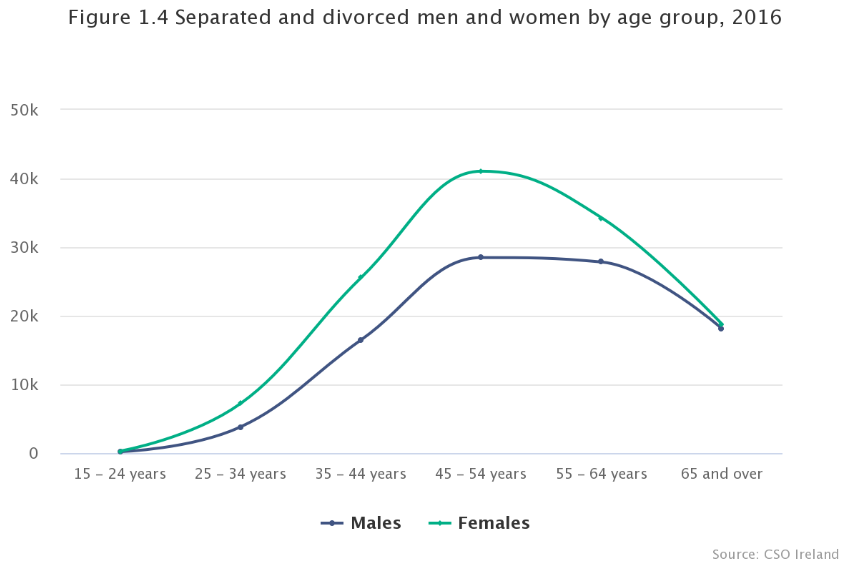



CSO.ie reports by Single Year of Age, Sex, Marital Status and CensusYear: [(CSO.ie, 2019)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3011&PLanguage=0)

In [5]:
# adapted from: https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe
# add an empty column to data frame for marital status
df['marital'] = np.nan
df.head()


,gender,age,marital
0,Male,2,NaN
1,Female,60,NaN
2,Male,48,NaN
3,Female,6,NaN
4,Male,60,NaN


In [108]:
b0 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b1 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b2 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b3 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b4 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b5 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b6 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b7 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b8 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b9 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b10 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b11 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b12 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b13 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b14 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b15 =	[	1.00000	,	0.00000	,	0.00000	,	0.00000	]
b16 =	[	0.99997	,	0.00003	,	0.00000	,	0.00000	]
b17 =	[	0.99990	,	0.00003	,	0.00006	,	0.00000	]
b18 =	[	0.99608	,	0.00335	,	0.00032	,	0.00025	]
b19 =	[	0.99383	,	0.00529	,	0.00020	,	0.00068	]
b20 =	[	0.99004	,	0.00838	,	0.00070	,	0.00088	]
b21 =	[	0.98727	,	0.01135	,	0.00084	,	0.00054	]
b22	=	[	0.98192	,	0.01610	,	0.00128	,	0.00070	]
b23	=	[	0.97485	,	0.02240	,	0.00194	,	0.00081	]
b24	=	[	0.96771	,	0.02985	,	0.00174	,	0.00070	]
b25	=	[	0.94506	,	0.05168	,	0.00243	,	0.00083	]
b26	=	[	0.92739	,	0.06762	,	0.00387	,	0.00112	]
b27	=	[	0.86207	,	0.13244	,	0.00433	,	0.00116	]
b28	=	[	0.85625	,	0.13602	,	0.00661	,	0.00112	]
b29	=	[	0.80778	,	0.18144	,	0.00908	,	0.00170	]
b30	=	[	0.73128	,	0.25666	,	0.01011	,	0.00195	]
b31	=	[	0.67489	,	0.30761	,	0.01552	,	0.00198	]
b32	=	[	0.61324	,	0.36799	,	0.01704	,	0.00172	]
b33	=	[	0.55402	,	0.42287	,	0.02103	,	0.00208	]
b34	=	[	0.50436	,	0.47039	,	0.02354	,	0.00171	]
b35	=	[	0.46546	,	0.50515	,	0.02756	,	0.00183	]
b36	=	[	0.42979	,	0.53923	,	0.02876	,	0.00223	]
b37	=	[	0.38644	,	0.57607	,	0.03526	,	0.00224	]
b38	=	[	0.36702	,	0.59379	,	0.03686	,	0.00234	]
b39	=	[	0.33344	,	0.62159	,	0.04189	,	0.00308	]
b40	=	[	0.31765	,	0.63347	,	0.04545	,	0.00342	]
b41	=	[	0.30498	,	0.63878	,	0.05290	,	0.00334	]
b42	=	[	0.29184	,	0.64704	,	0.05684	,	0.00428	]
b43	=	[	0.27681	,	0.65653	,	0.06209	,	0.00457	]
b44	=	[	0.26125	,	0.66774	,	0.06617	,	0.00484	]
b45	=	[	0.25750	,	0.66918	,	0.06878	,	0.00454	]
b46	=	[	0.24391	,	0.67496	,	0.07484	,	0.00629	]
b47	=	[	0.22451	,	0.68602	,	0.08296	,	0.00651	]
b48	=	[	0.22197	,	0.68300	,	0.08763	,	0.00741	]
b49	=	[	0.21529	,	0.68383	,	0.09186	,	0.00902	]
b50	=	[	0.21053	,	0.68760	,	0.09306	,	0.00881	]
b51	=	[	0.20282	,	0.68640	,	0.10037	,	0.01041	]
b52	=	[	0.19407	,	0.69115	,	0.10350	,	0.01128	]
b53	=	[	0.18121	,	0.69454	,	0.11064	,	0.01361	]
b54	=	[	0.18170	,	0.69301	,	0.11017	,	0.01512	]
b55	=	[	0.17663	,	0.69641	,	0.10984	,	0.01712	]
b56	=	[	0.16868	,	0.69765	,	0.11322	,	0.02045	]
b57	=	[	0.16077	,	0.70473	,	0.11374	,	0.02075	]
b58	=	[	0.15842	,	0.70356	,	0.11427	,	0.02375	]
b59	=	[	0.15177	,	0.70448	,	0.11668	,	0.02707	]
b60	=	[	0.15180	,	0.70801	,	0.11047	,	0.02972	]
b61	=	[	0.15240	,	0.70329	,	0.11156	,	0.03274	]
b62	=	[	0.14947	,	0.71155	,	0.10380	,	0.03518	]
b63	=	[	0.14688	,	0.71203	,	0.10267	,	0.03843	]
b64	=	[	0.14146	,	0.71181	,	0.10316	,	0.04357	]
b65	=	[	0.14512	,	0.70696	,	0.09919	,	0.04873	]
b66	=	[	0.14723	,	0.70685	,	0.09208	,	0.05384	]
b67	=	[	0.14387	,	0.70637	,	0.09073	,	0.05903	]
b68	=	[	0.13709	,	0.71633	,	0.08300	,	0.06358	]
b69	=	[	0.13242	,	0.72093	,	0.07780	,	0.06884	]
b70	=	[	0.12949	,	0.71802	,	0.06838	,	0.08411	]
b71	=	[	0.12948	,	0.71997	,	0.06945	,	0.08110	]
b72	=	[	0.13481	,	0.70966	,	0.06552	,	0.09002	]
b73	=	[	0.13415	,	0.70994	,	0.05790	,	0.09801	]
b74	=	[	0.13769	,	0.70213	,	0.05372	,	0.10646	]
b75	=	[	0.14330	,	0.68218	,	0.05172	,	0.12280	]
b76	=	[	0.14309	,	0.67929	,	0.04679	,	0.13084	]
b77	=	[	0.13935	,	0.68104	,	0.04541	,	0.13421	]
b78	=	[	0.15068	,	0.66349	,	0.03837	,	0.14746	]
b79	=	[	0.15079	,	0.64695	,	0.03770	,	0.16457	]
b80	=	[	0.15370	,	0.63544	,	0.03146	,	0.17940	]
b81	=	[	0.15944	,	0.62108	,	0.02982	,	0.18965	]
b82	=	[	0.16216	,	0.60068	,	0.02759	,	0.20957	]
b83	=	[	0.16285	,	0.58691	,	0.02241	,	0.22783	]
b84	=	[	0.16957	,	0.56738	,	0.02036	,	0.24269	]
b85	=	[	0.16539	,	0.55145	,	0.01877	,	0.26438	]
b86	=	[	0.18221	,	0.52369	,	0.01487	,	0.27923	]
b87	=	[	0.18333	,	0.49340	,	0.01572	,	0.30755	]
b88	=	[	0.18774	,	0.47073	,	0.01717	,	0.32436	]
b89	=	[	0.18233	,	0.44828	,	0.01417	,	0.35522	]
b90	=	[	0.19605	,	0.40944	,	0.00717	,	0.38733	]
b91	=	[	0.18505	,	0.40408	,	0.01208	,	0.39879	]
b92	=	[	0.21739	,	0.34058	,	0.00518	,	0.43685	]
b93	=	[	0.18742	,	0.33869	,	0.01205	,	0.46185	]
b94	=	[	0.18702	,	0.29962	,	0.00763	,	0.50573	]
b95	=	[	0.17784	,	0.32216	,	0.00258	,	0.49742	]
b96	=	[	0.23988	,	0.30530	,	0.04984	,	0.40498	]
b97	=	[	0.25000	,	0.22917	,	0.04688	,	0.47396	]
b98	=	[	0.19355	,	0.23656	,	0.02151	,	0.54839	]
b99	=	[	0.22973	,	0.33784	,	0.05405	,	0.37838	]
b100	=	[	0.22619	,	0.16667	,	0.01190	,	0.59524	]


In [111]:
a=['single', 'married', 'divorced', 'widowed']
bs=[b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,
        b26,b27,b28,b29,b30,b31,b32,b33,b34,b35,b36,b37,b38,b39,b40,b41,b42,b43,b44,b45,b46,b47,b48,b49,b50,
        b51,b52,b53,b54,b55,b56,b57,b58,b59,b60,b61,b62,b63,b64,b65,b66,b67,b68,b69,b70,b71,b72,b73,b74,b75,
        b76,b77,b78,b79,b80,b81,b82,b83,b84,b85,b86,b87,b88,b89,b90,b91,b92,b93,b94,b95,b96,b97,b98,b99,b100]
for i, var in zip((0,99), bs):
    c = np.random.choice(a, p=var)
    print(c)
    df.loc[(df['gender'] == 'Male') & (df['age'] == i), 'marital'] = c 

#df2= df.sort_values(by='age')
#df2   
    

single
single
